# Clustering

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [38]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

## Partitional Clustering - K-means
#### Generate sample data

In [18]:
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

#### Apply K-means clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### Visualize clusters

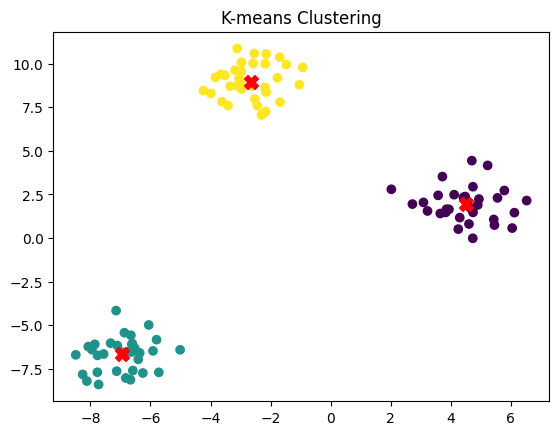

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.title('K-means Clustering')
plt.show()

#### Apply K-means++ initialization

In [8]:
kmeans_plusplus = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init='auto')
kmeans_plusplus.fit(X)
labels_kmeans_plusplus = kmeans_plusplus.labels_

---

# Hierarchical Clustering

#### Apply Agglomerative Clustering

In [9]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X)
labels_agglo = agglomerative.labels_

#### Generate linkage matrix

Link can be of different types:

- Single Linkage: The distance between two clusters is defined as the shortest distance between two points in each cluster.

- Complete Linkage: The distance between two clusters is defined as the longest distance between two points in each cluster.

- Average Linkage: The distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

- Centroid Linkage: The distance between two clusters is defined as the distance between the two mean vectors of each cluster.

- Ward Linkage: The distance between two clusters is defined as the sum of squared differences within all clusters.

#### Generate dendrogram

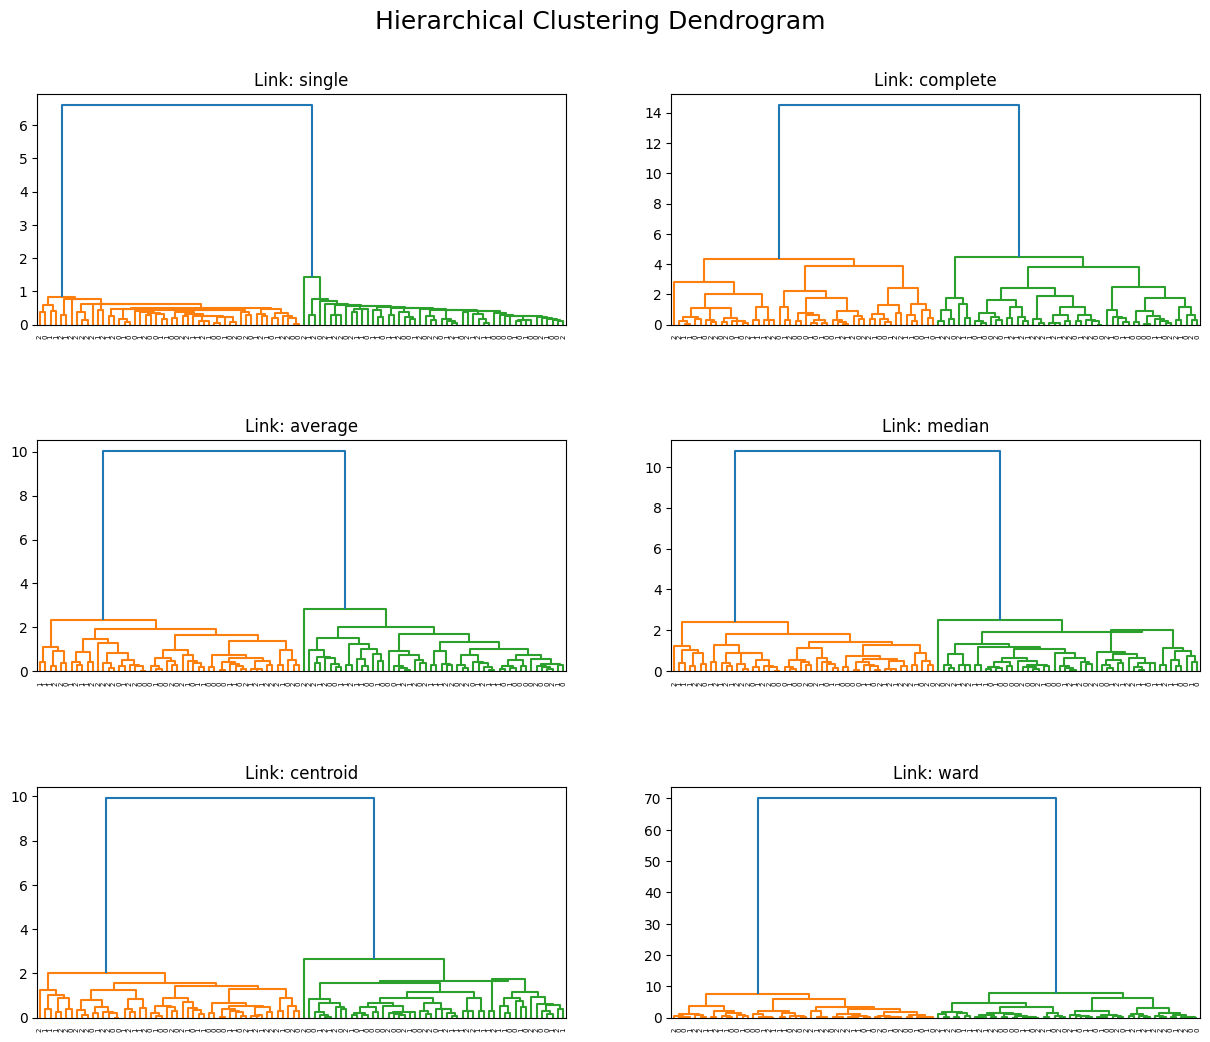

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Hierarchical Clustering Dendrogram", fontsize=18, y=0.95)

methods = ['single', 'complete', 'average', 'median', 'centroid', 'ward']

for i, method in enumerate(methods):
    linkage_matrix = linkage(X, method=method)
    ax = axs[i // 2, i % 2]
    ax.set_title(f'Link: {method}')
    dendrogram(linkage_matrix, labels=agglomerative.labels_, ax=ax)

plt.show()

---

# Density-Based Clustering - DBSCAN

#### Generate sample data

In [20]:
X, _ = make_blobs(n_samples=100, centers=2, random_state=42)

#### Apply DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels_dbscan = dbscan.labels_

#### Visualize clusters

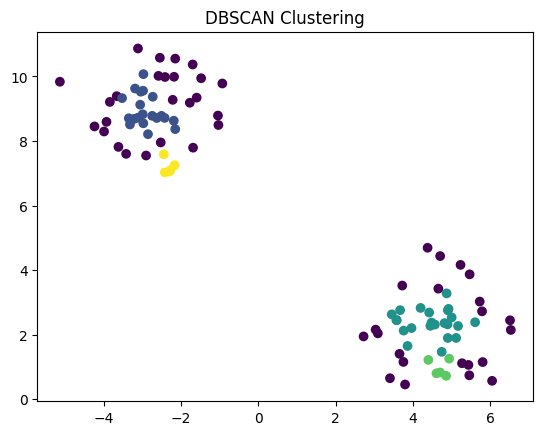

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan)
plt.title('DBSCAN Clustering')
plt.show()

---

# Cluster Evaluation

#### Calculate silhouette score for K-means clustering and plot silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.8329367162955609
For n_clusters = 3 The average silhouette_score is : 0.5705362382816298
For n_clusters = 4 The average silhouette_score is : 0.589891903746777
For n_clusters = 5 The average silhouette_score is : 0.3203080543887989
For n_clusters = 6 The average silhouette_score is : 0.3183410162189698


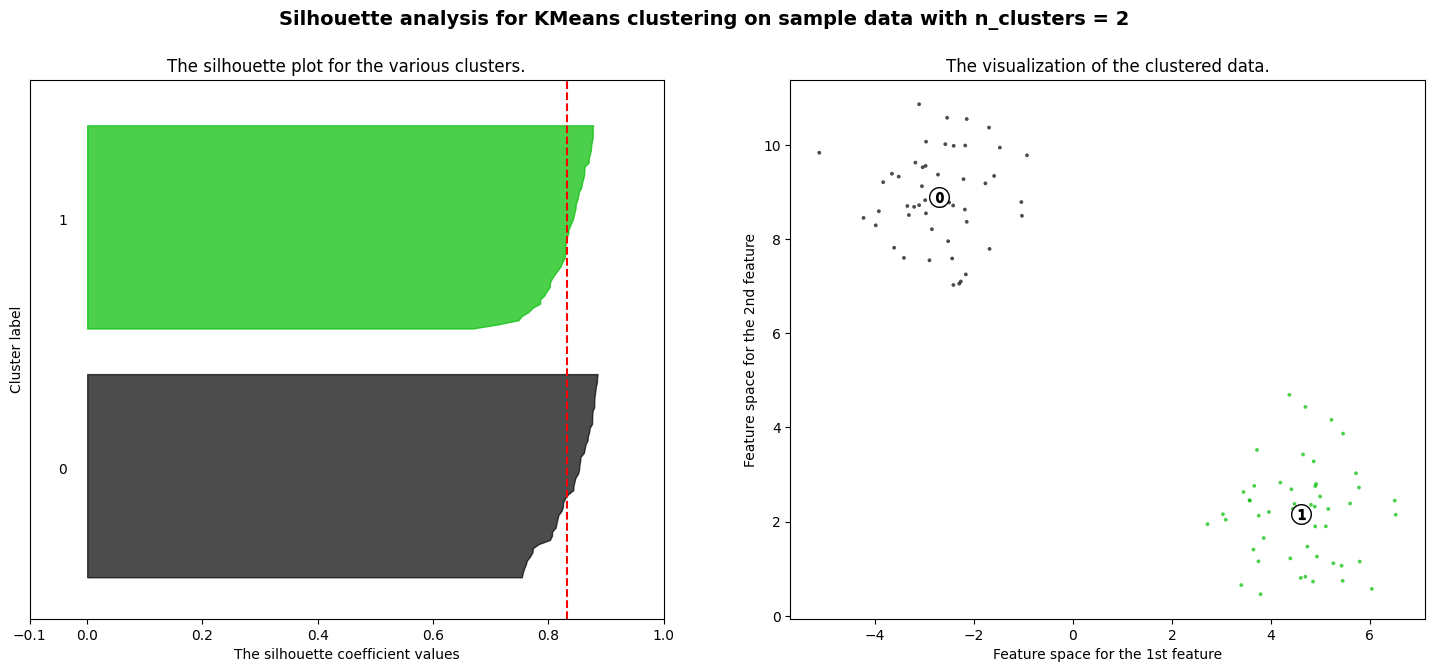

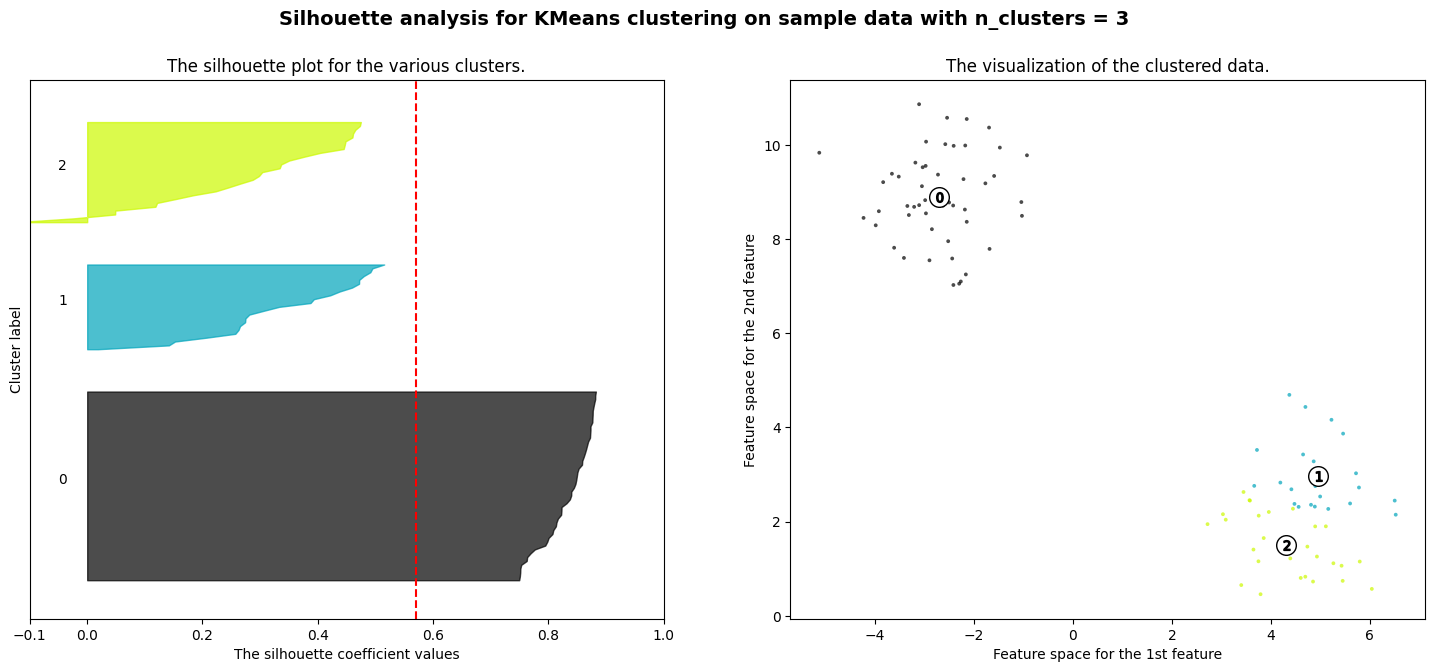

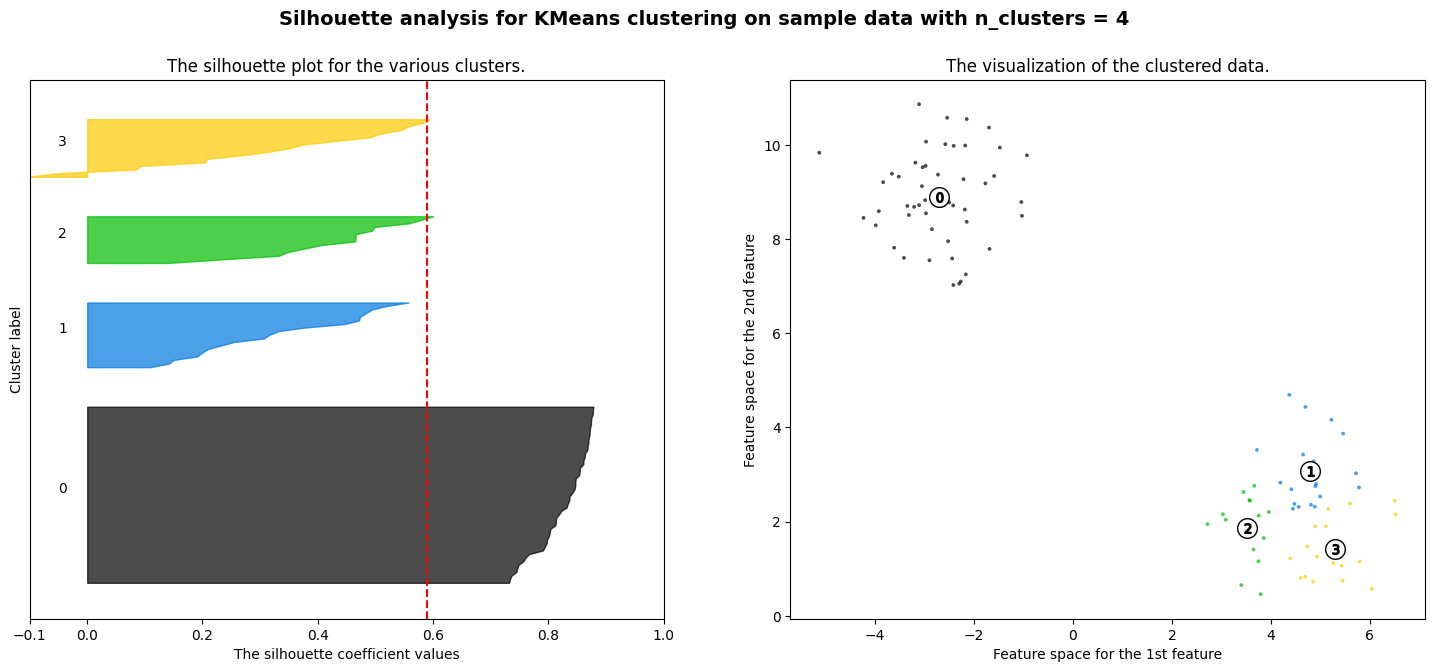

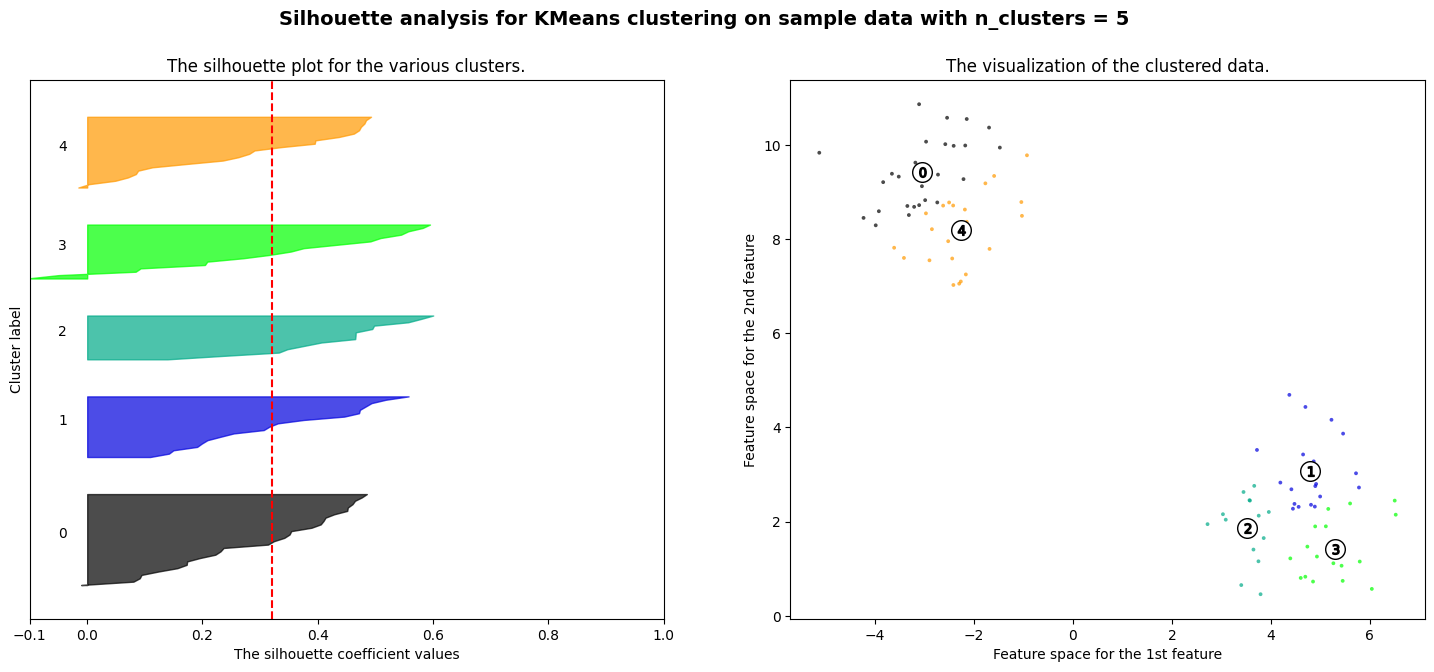

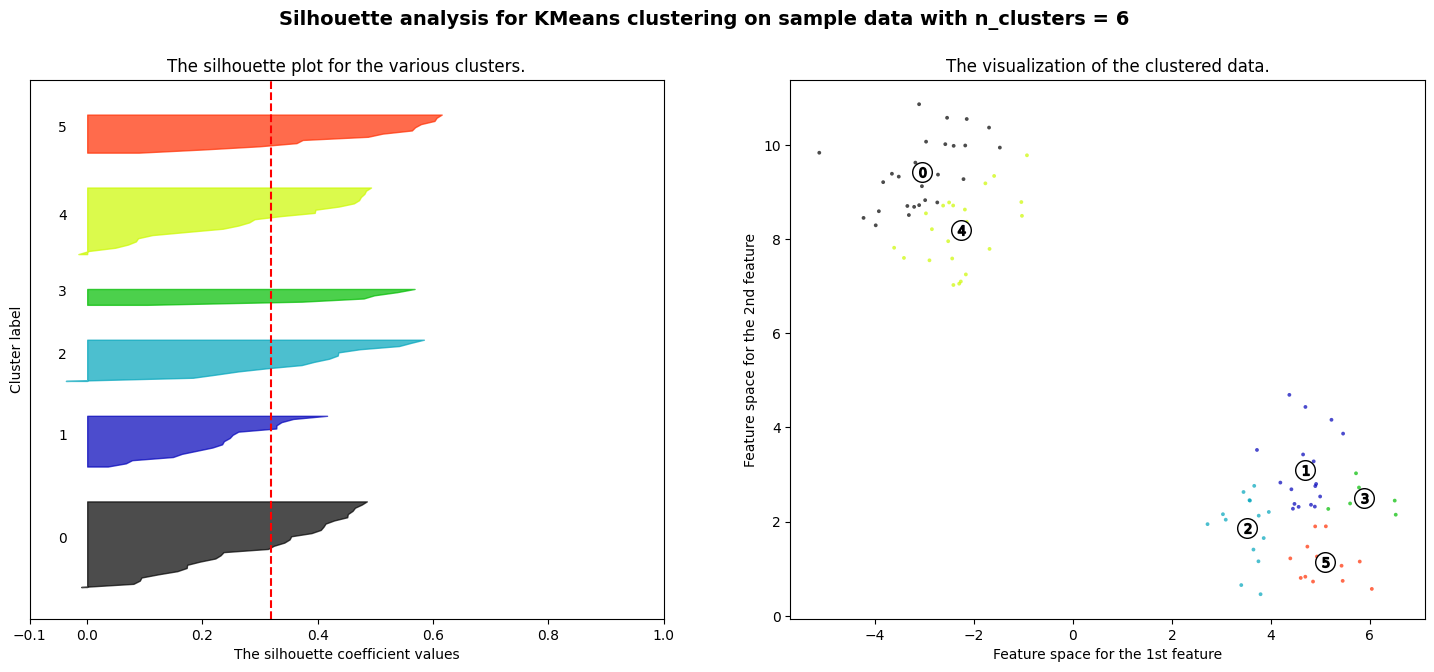

In [39]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

---

# Cluster Validity

#### Compute cohesion and separation for clusters

A basic algorithm for computing cohesion and separation for clusters is as follows:

In [23]:
cohesion = 0.0
separation = 0.0
for i in range(len(X)):
    for j in range(len(X)):
        if labels[i] == labels[j]:
            cohesion += np.linalg.norm(X[i] - X[j])
        else:
            separation += np.linalg.norm(X[i] - X[j])
            
cohesion /= len(X)
separation /= len(X)

print("Cohesion:", cohesion)
print("Separation:", separation)

Cohesion: 192.72322278728294
Separation: 389.5177245274104


There are also better algorithms for computing cohesion and separation for clusters.

Take a look at https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation for a better understanding of cluster evaluation.

---

# What's Next?

Next notebook: [Dimensionality Reduction](https://github.com/vrughetti/python4DS/blob/main/notebooks/dim_reduction/dimensionality_reduction.ipynb)